In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Variabelm generieren wie 
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

#speichen als npz datei
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [5]:
#der datei laden
training_data = np.load('TF_intro.npz')

In [ ]:
#deklrieren die Anzahl der Input Variabelm
input_size = 2
#deklrieren die Anzahl der Output Variabelm
output_size = 1

#Fuktionen, die angeben, wie das Modell angelegt wird
#es ist nur eine Beschreibung des Netzwerks, keine Berechnung beinhaltet
model = tf.keras.Sequential([ 
    #das berechnen die punktprodukt von Gewicht und Input, fügt das Bias hinzu und wendet auch die Aktivierungsfunktion an 
            tf.keras.layers.Dense(output_size,
                                #Anfangwert für Gewichte 
                                kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                #Anfangwert für Bias 
                                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 ))
])


#SGD = stochastic gradient descent optimizer 
#in benutzerdefinierter Optimiere können wir die Lernrate und verlust Fuktion defenieren
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


#compile ist der Platz, wo man optimizer und loss wählen
#loss = L2-Norm skaliert durch die Anzahl der Beobachtung
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
#loss = huber_loss eignet sich besonders für Datensätze mit Ausreißen

#Model tranieren, Angabe des Inputs und das Target
# epoch = wie viel Mal wir die Datei tranieren, der Standardwert ist 1, und normalerweise brauchen wir mehr als 1
# verbose = 0 schweigen, verbose = 1 animierter Fortschrittsbalken, verbose = 2 
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


Epoch 1/100
32/32 - 1s - 34ms/step - loss: 19.6910
Epoch 2/100
32/32 - 0s - 6ms/step - loss: 1.5100
Epoch 3/100
32/32 - 0s - 4ms/step - loss: 0.4584
Epoch 4/100
32/32 - 0s - 4ms/step - loss: 0.3586
Epoch 5/100
32/32 - 0s - 4ms/step - loss: 0.3730
Epoch 6/100
32/32 - 0s - 6ms/step - loss: 0.3761
Epoch 7/100
32/32 - 0s - 6ms/step - loss: 0.3785
Epoch 8/100
32/32 - 0s - 4ms/step - loss: 0.3904
Epoch 9/100
32/32 - 0s - 4ms/step - loss: 0.3671
Epoch 10/100
32/32 - 0s - 4ms/step - loss: 0.4002
Epoch 11/100
32/32 - 0s - 4ms/step - loss: 0.3900
Epoch 12/100
32/32 - 0s - 6ms/step - loss: 0.3662
Epoch 13/100
32/32 - 0s - 5ms/step - loss: 0.4010
Epoch 14/100
32/32 - 0s - 5ms/step - loss: 0.3670
Epoch 15/100
32/32 - 0s - 5ms/step - loss: 0.3695
Epoch 16/100
32/32 - 0s - 5ms/step - loss: 0.3823
Epoch 17/100
32/32 - 0s - 5ms/step - loss: 0.4051
Epoch 18/100
32/32 - 0s - 5ms/step - loss: 0.3766
Epoch 19/100
32/32 - 0s - 6ms/step - loss: 0.3877
Epoch 20/100
32/32 - 0s - 7ms/step - loss: 0.3757
Epoch 2

In [ ]:
#die Gewichte und den Bias extrahieren
#das ist normalerweise unnotwendig, nur weil wir das Ergebnis checken möchten
model.layers[0].get_weights()

[array([[ 2.0356293],
        [-3.0103345]], dtype=float32),
 array([5.003321], dtype=float32)]

In [13]:
#vorhersage der neuen Werte
#das ist normalerweise unnotwendig, nur weil wir diese Funktionalität erlernen

prediction = model.predict_on_batch(training_data['inputs'])

Text(0, 0.5, 'targets')

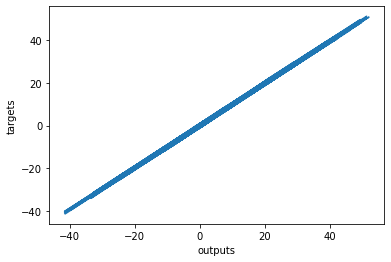

In [15]:
#Vorhersage plotten
#np.squeeze ist notwendig für plot
plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')

in vergleichen zu Numpy, tensorflow zeigt schon die folgende Vorteile: die Definition für die Anfangswerten der Gewichte, der Lernrate oder des Bias sind nicht notwendig